# ST-DBSCAN


## Exemple: détection des zones plates en montagne

In [1]:
import matplotlib.pyplot as plt
import os
import sys

#-------------------------------------------------------
# Import de tracklib

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import os
import tracklib.core.Utils as utils
from tracklib.core.ObsTime import ObsTime
from tracklib.io.TrackReader import TrackReader

# 
ObsTime.setReadFormat("4Y-2M-2D 2h:2m:2s")
resource_path = './'
filepath = os.path.join(resource_path, '../../../data/XYZBRAVOSANSFIDOUTEST.txt')
track = TrackReader.readFromCsv(filepath, 0, 1, 2, -1, h=1)

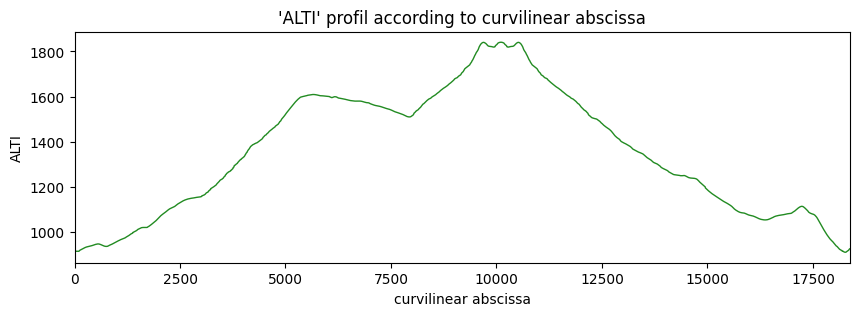

In [3]:
from tracklib.core.Kernel import GaussianKernel
from tracklib.core.Operator import Operator
from tracklib.algo.Cinematics import computeAbsCurv

kernel = GaussianKernel(3)
track.operate(Operator.FILTER, "z", kernel, "z_filtered")
track.operate("z=z_filtered")

computeAbsCurv(track)

track.plotProfil('SPATIAL_ALTI_PROFIL')
plt.show()

249 1105 6


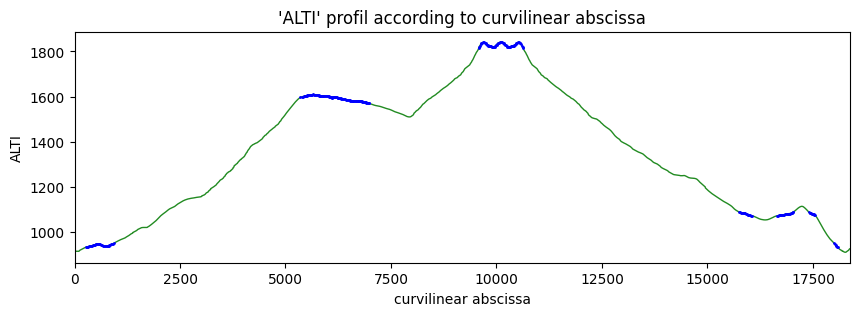

In [4]:
from tracklib.algo.Segmentation import stdbscan, computeAvgCluster

stdbscan(track, 'z', 500, 5, 20, 25)

X1 = []
Y1 = []
X2 = []
Y2 = []
C2 = []
for i in range(len(track)):
    o = track[i]
    ac = track.getObsAnalyticalFeature('abs_curv', i)
    noise = track.getObsAnalyticalFeature('noise', i)
    cluster = track.getObsAnalyticalFeature('stdbscan', i)
    
    if noise > 0:
        X1.append(ac)
        Y1.append(o.position.getZ())
    if cluster > 0:
        X2.append(ac)
        Y2.append(o.position.getZ())
        C2.append(cluster)
    
    
track.plotProfil('SPATIAL_ALTI_PROFIL')

from collections import Counter
print (len(X2), track.size(), len(Counter(C2).keys()))

plt.plot(X2, Y2, 'bo', markersize=1)
plt.show()